# <center>第一部分——NRC字典的介绍与词汇的分立情感数据的向量化合并</center>

## 〇、NRC词典的介绍
### 1.NRC词典简介
- <font size=3>NRC词典为加拿大国家研究委员会信息技术研究所(Institute for Information Technology, National Research Council Canada. )组织制作的基于众包方式标注出的词典。
    
- 众包:
>众包模式是指一个公司或机构把过去由员工执行的工作任务，以自由自愿的形式外包给非特定的，而且通常是大型的大众网络的模式。众包的任务通常由个人来承担，但如果涉及到需要多人协作完成的任务，也有可能以依靠开源的个体生产的形式出现。

    牛津词典与众包
>在19世纪，一些非常聪明的人要求重新检查整个英语，这是牛津英语词典的诞生过程，个人无法开展如此规模的项目。1879年，在此刻的激动之下，哲学家詹姆斯·默里（James Murray）让他的英语读者向他发送日常和不寻常的词语。他的要求得到了巨大的积极回应。因此，牛津英语词典是第一个将任务外包给人群的项目 – 真正意义上的众包。

    

- <font size=3>NRC词典是**每个英语单词对应的八种基本情绪(愤怒、恐惧、期待、信任、惊讶、悲伤、喜悦和厌恶),两种情绪(消极\积极)的关联列表**,关联程度用0~1之间的数字表示.
    
- 示例:(与anger关联的单词)


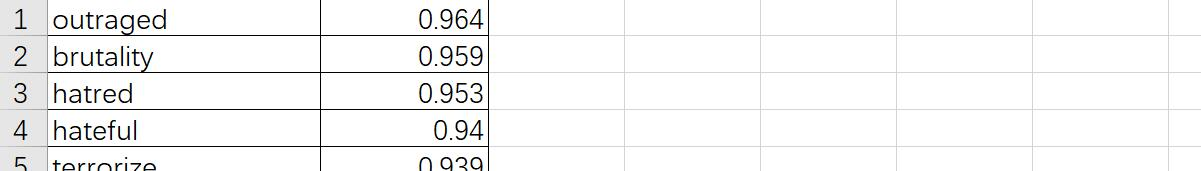

### 2.我所获得的NRC词典数据
- <font size=3>专业版词典只对商业用户开放,在我所获得的词典中只包含**八个基本情绪对应单词的关联列表(如图)**

    
</font>

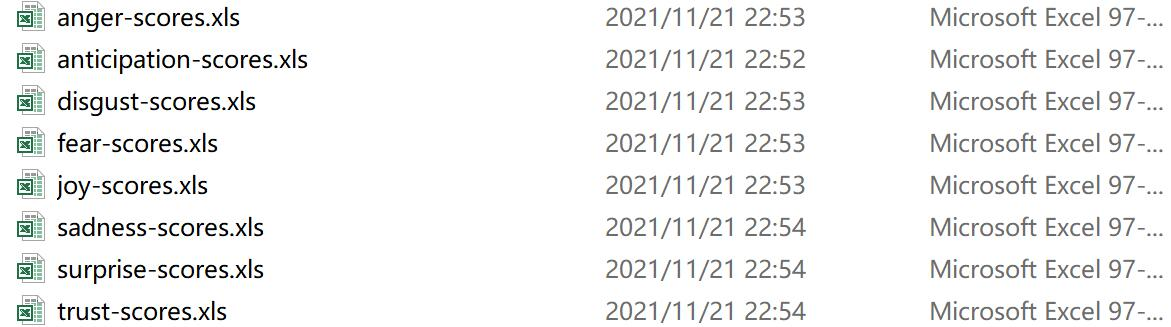

### 3.分立情感数据文件的向量化合并
- <font size=3>要在情感分析中高效率运用NRC词典,要将不同情感的词语列表合并.
- 于是考虑合成一种**以每个单词作为标签(向量名),后面加上八种不同情感关联数据的八维向量列表**
- 如图
    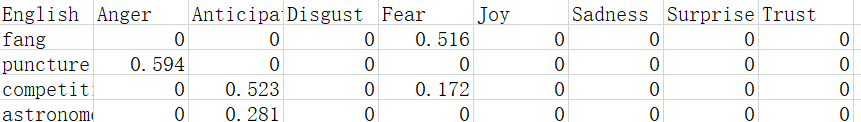

    
- 该部分的代码便是实现该数据处理的过程
</font>

## 一、定义将excel表格内容读取到列表中的函数
### xlrd库介绍：
- <font size=3>xlrd是python用于读取excel的第三方扩展包，在使用之前需要安装xlrd库。
- 使用库中的open_workbook()函数打开指定位置的工作表,用sheet_by_name()函数打开指定名称的工作簿.
- sheet.nrows与sheet.ncols获取行数与列数。</font>

In [1]:
import xlrd

def open_excel(file_xls):#定义将excel的内容转移到列表的函数
    wb = xlrd.open_workbook(file_xls)# 打开Excel文件
    sheet = wb.sheet_by_name('Sheet2')#通过excel表格名称(rank)获取工作表
    data = []  #创建空list作为目标文件
    for r in range(sheet.nrows):#循环读取表格内容（每次读取一行数据）
        data1=[]
        for c in range(sheet.ncols):
            data1.append(sheet.cell_value(r,c))
        data.append(list(data1))
    return data

## 二、定义在指定目录下筛选所有xls文件并将其路径做成列表的函数find_excel(root_path)
### 1、os库介绍：
- <font size=3>
os模块是Python标准库中的一个用于访问操作系统相关功能的模块。os模块提供了与操作系统即电脑系统之间进行交互的一些功能。很多自动化操作都会依赖该库的功能。
- os.listdir() 方法用于返回指定的文件夹包含的文件或文件夹的名字的列表。
- os.path.splitext("文件路径")用于分离文件名与扩展名</font>
### 2.文件类型的判定
- <font size=3>利用os.path.splitext("文件路径")方法分离文件名与拓展名后用
    
    <code>if file_type ==".xls"</code>
    
    判定文件类型
- 利用代码
    
    <code>root_path+"\\"+file</code>
    
    返回文件的绝对路径
</font>


In [2]:
def find_excel(root_path):#root_path即要搜索的文件根目录
    import os
    
    all_file_list =[]#创建储存xls文件地址的列表

    flie_type=""#储存文件的拓展名的字符串变量
    file_data=[]#用于储存root_path下所有文件的列表
    
    file_data=os.listdir(root_path)#寻找目录下所有文件
    
    #对每个文件循环判定是否为xls类型
    for file in file_data:
        file_type=os.path.splitext(file)[1]#提取拓展名
        if file_type ==".xls":
            all_file_list.append(root_path+"\\"+file)
    return(all_file_list)#筛选特定目录下xls文件并且将文件路径做成列表

## 三、运行上述函数,筛选所有xls文件并将其路径做成列表.

In [3]:
source_list=[]#八个文件的路径列表
source_list=find_excel(r'C:\Users\Administrator\Desktop\基于NRC词典的文本情感分析\NRC词典\onefileperemotion')
source_list#展示列表

['C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\anger-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\anticipation-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\disgust-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\fear-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\joy-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\sadness-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\surprise-scores.xls',
 'C:\\Users\\Administrator\\Desktop\\基于NRC词典的文本情感分析\\NRC词典\\onefileperemotion\\trust-scores.xls']

## 四、列表合并向量化

### 1.xlsxwriter库介绍
- <font size=3>xlrd是python用于写excel的第三方扩展包，在使用之前需要安装库。
- xlsxwriter.Workbook()方法打开excel文件中的工作簿，workbook.add_worksheet()打开工作表
- worksheet.write(i, j, data)方法写入数据</font>

### 2.创建词语情感向量列表框架（导入情感词汇）
- <font size=3>由于八个文件中**不同的情感对应的关联词语不同，所以不同情感包含的词汇不尽相同**
- 为了创造一个统一的词情感汇向量列表，需要将八个文件中包含的所有词语**无重复地**提取出来
    
    *( 运用list(set()) ）来去除重复元素*</font>

<code>for file_xls in s_list:
    file=open_excel(file_xls)
    for v in file:
       file_word.append(v[0])
file_word=list(set(file_word))</code>

### 3、将不同情感的数据合并并且向量化
- <font size=3>
对每一个词语情感文件都提取第一列作为索引目录存放到word_in_file中，随后对上一部分构建的总列表框架循环，用<code>weight=file[word_in_file.index(data[m][0])][1]</code>
    语句来找到词语情感文件中与data[m][0]一致的单词对应关联度
</font>
- <font size=3>情感关联列表中未出现词汇在该项情感向量分量为0
- 最后添加每个向量分量对应标签，将data列表写入新的excel表格

In [4]:
def combine_list(s_list,target_xls):#分别为要合并的文件表与合并后的文件列表
    import xlsxwriter
    
    word_data=[]
    file_word=[]#八个文件包含的所有词语的列表
    data=[]#存放合并后的词语情感向量列表
    
    #创建词语情感向量列表的框架（输入情感词汇），提取八个词典中包涵的所有的词语到file_word中
    for file_xls in s_list:
        file=open_excel(file_xls)#运用了前文的excel读取函数
        for v in file:
            file_word.append(v[0])
    file_word=list(set(file_word))#去除file_word中的重复元素
    
    #将词汇数据移动到data，构造一个不含向量数据的二维词汇列表框架
    for word in file_word:
        data.append([word])
    
    #将不同情感的数据合并并且向量化
    for file_xls in s_list:
        file=open_excel(file_xls)
        #创建情感文件中对应的词汇索引目录，共下面索引
        word_in_file=[]
        for v in file:
            word_in_file.append(v[0])
        for m in range(len(data)):
            if data[m][0] in word_in_file:
                weight=file[word_in_file.index(data[m][0])][1]#寻找对应情感列表中相应词语(data[m][0])的权重
                data[m].append(weight)
            else :
                data[m].append(0)#遍历data(file_word)中词汇，将每种情感文件中的数据输入data列表(每个情感文件中不包括的词语加权为0)。
    
    #定义对应情感的标签(表头)
    english_df=[['English (en)','Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]
    data=english_df+data#添加表头
    
    # 将data中的数据复制到target_xls的工作表中
    workbook = xlsxwriter.Workbook(target_xls)
    worksheet = workbook.add_worksheet()#打开目标存放文件中的工作表
    for i in range(len(data)):
        for j in range(len(data[i])):
            worksheet.write(i, j, data[i][j])
    workbook.close()

In [5]:
target_list=r"C:\Users\Administrator\Desktop\基于NRC词典的文本情感分析\NRC词典\all_word_emotion\all_emotions.xlsx"
combine_list(source_list,target_list)

## 五、运行程序，得出结果
### 结果展示（部分）：
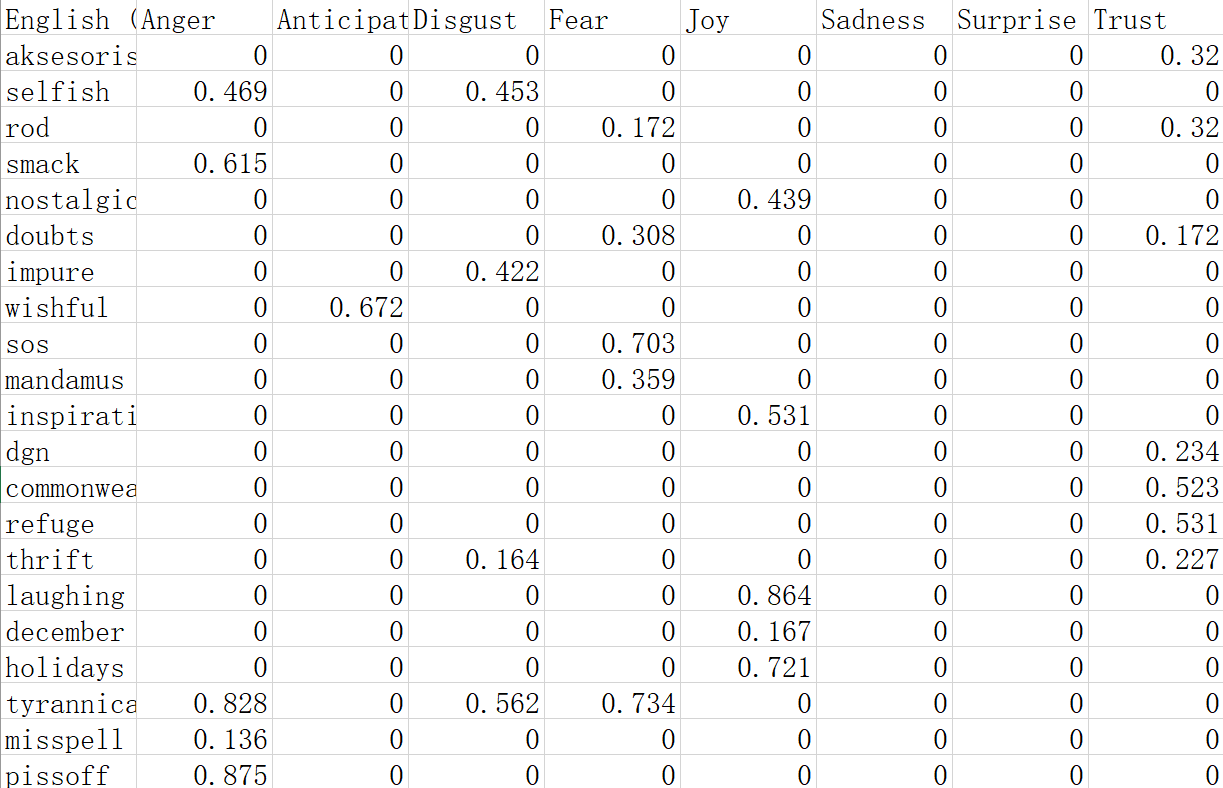